<a href="https://colab.research.google.com/github/GitTanish/DataAnalysis/blob/main/Linear_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohithsairamreddy/salary-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/salary-data


#### Importing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


####  Step 2: Load the Dataset

In [ ]:
df = pd.read_csv('/content/Salary_Data.csv')

In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


#### Step 3: Dataset Structure

In [ ]:
print("\n--- 1. Dataset Structure ---")
print("Rows and Columns:", df.shape)
print("\nData Types:\n")
print(df.dtypes)


--- 1. Dataset Structure ---
Rows and Columns: (6704, 6)

Data Types:

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


####Step 4: Missing Values

In [ ]:
print("\n--- 2. Missing Values ---")
print("Missing values per column:\n")
print(df.isnull().sum())



--- 2. Missing Values ---
Missing values per column:

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


####Step 5: Salary Univariate Analysis

In [ ]:
print("\n--- 3.1 Salary Distribution ---")
print("Mean Salary:", df['Salary'].mean())
print("Median Salary:", df['Salary'].median())
print("Minimum Salary:", df['Salary'].min())
print("Maximum Salary:", df['Salary'].max())
print("Standard Deviation of Salary:", df['Salary'].std())



--- 3.1 Salary Distribution ---
Mean Salary: 115326.96477086132
Median Salary: 115000.0
Minimum Salary: 350.0
Maximum Salary: 250000.0
Standard Deviation of Salary: 52786.183910682936


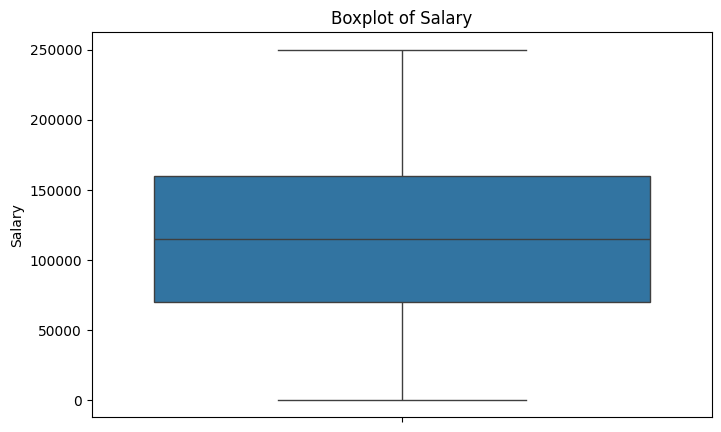

In [ ]:
# Outliers in salary
plt.figure(figsize=(8,5))
sns.boxplot(y=df['Salary'])
plt.title('Boxplot of Salary')
plt.show()


####Step 6: Age and Experience Distribution

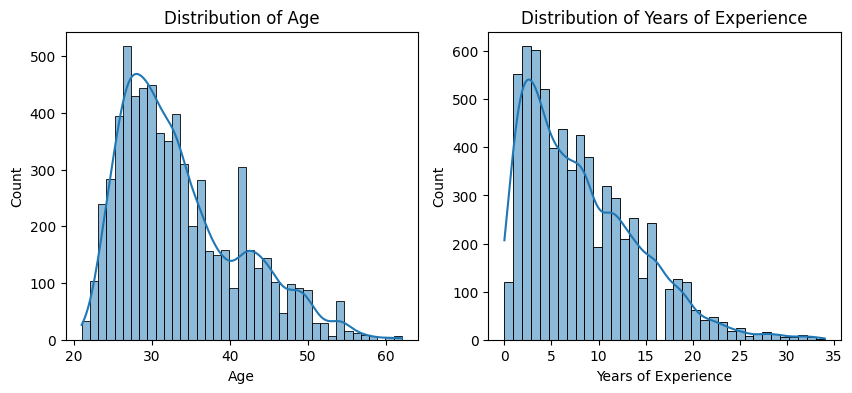

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1,2,2)
sns.histplot(df['Years of Experience'], kde=True)
plt.title('Distribution of Years of Experience')
plt.show()


####Step 7: Predict Salary from Experience (Linear Regression)


In [ ]:
df_model = df[['Years of Experience', 'Salary']].dropna()

In [ ]:
# Set X (independent) and y (dependent)
X = df_model[['Years of Experience']]
y = df_model['Salary']


In [ ]:
# Train model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
# Predict and Plot
y_pred = model.predict(X)


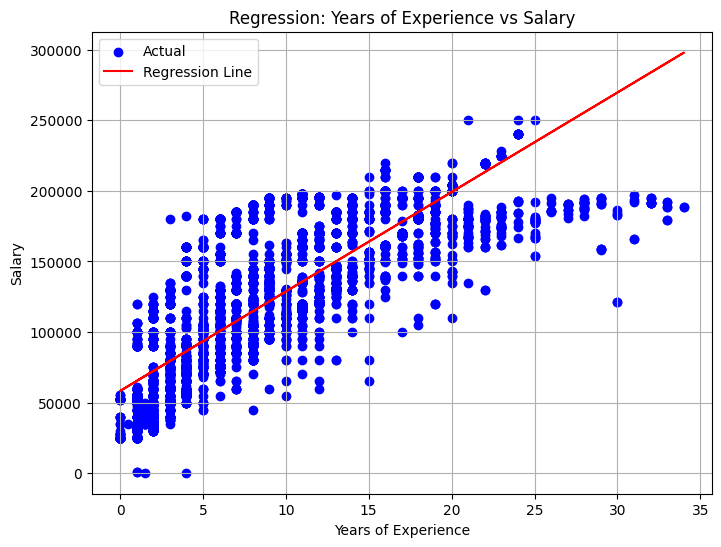

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Regression: Years of Experience vs Salary')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Model Performance
print("\n--- 5. Model Performance ---")
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R^2 Score:", r2_score(y, y_pred))



--- 5. Model Performance ---
Coefficient (Slope): 7046.7683440275105
Intercept: 58283.27509417885
R^2 Score: 0.6544307456514592


#### Step 8: Categorical Analysis

In [ ]:
# How does Salary vary by Gender?
print(df.groupby('Gender')['Salary'].mean())

Gender
Female    107888.998672
Male      121389.870915
Other     125869.857143
Name: Salary, dtype: float64


In [ ]:
# How does Education Level impact Salary?
print(df.groupby('Education Level')['Salary'].agg(['mean', 'median']))

                            mean    median
Education Level                           
Bachelor's         124767.658730  130000.0
Bachelor's Degree   85174.886093   75000.0
High School         36706.694196   30000.0
Master's           157604.166667  177500.0
Master's Degree    125075.333969  122000.0
PhD                165684.828947  170000.0
phD                120000.000000  120000.0


####9.	Which job titles have the highest and lowest average salaries?

In [ ]:
if 'Job Title' in df.columns:
    avg_salary_job = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False)
    print("\nHighest Average Salaries:\n")
    print(avg_salary_job.head(5))
    print("\nLowest Average Salaries:\n")
    print(avg_salary_job.tail(5))
else:
    print("No 'Job Title' column found.")



Highest Average Salaries:

Job Title
CEO                         250000.000000
Chief Technology Officer    250000.000000
Chief Data Officer          220000.000000
Director of Data Science    204561.403509
Director                    200000.000000
Name: Salary, dtype: float64

Lowest Average Salaries:

Job Title
Junior Sales Associate                28211.267606
Delivery Driver                       28000.000000
Receptionist                          25000.000000
Junior Business Operations Analyst    17675.000000
Social M                                       NaN
Name: Salary, dtype: float64


Mean Squared Error: 946833177.7094355
R-squared: 0.6669549610495003


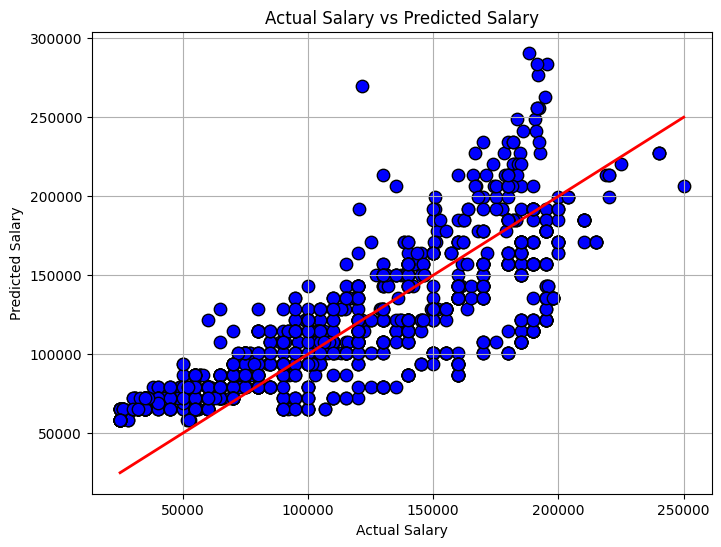

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_model = df[['Years of Experience', 'Salary']].dropna()
# Features and Target
X = df_model[['Years of Experience']]
y = df_model['Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# 📈 Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual Salary vs Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.show()


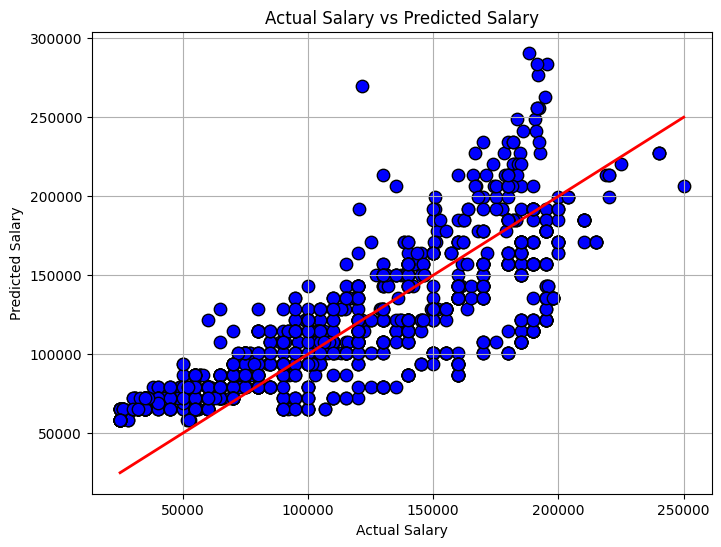

In [ ]:
# 📈 Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual Salary vs Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.show()

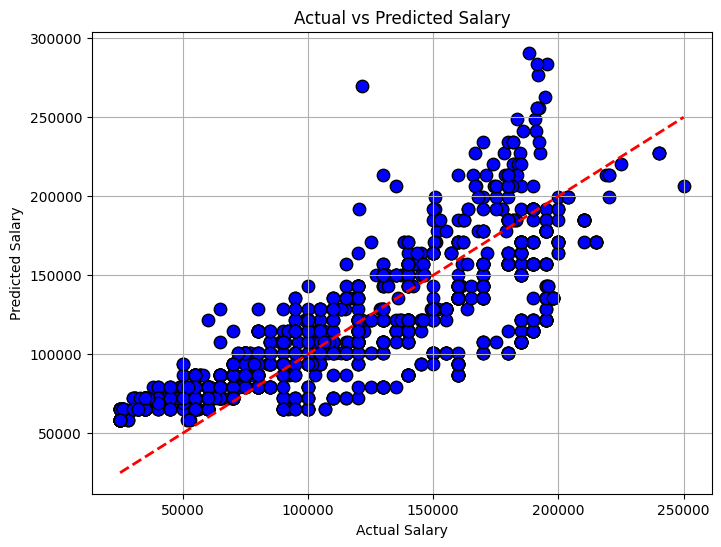

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, c='blue', edgecolors='k', s=80)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title('Actual vs Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid()
plt.show()
